# PARCIAL 1
### Angie Yahaira Zapata Lombana

In [122]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [123]:
df = pd.read_csv('Data/StudentsPerformance_exam1.csv')

### Tipos de variables del dataset

In [124]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [125]:
df.head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,non-binary,group B,bachelor's degree,standard,none,72.0,72.0,NaN
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,NaN,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0
5,NaN,group B,associate's degree,standard,none,71.0,83.0,78.0
6,non-binary,group B,some college,standard,completed,88.0,95.0,92.0
7,male,group B,some college,free/reduced,none,40.0,43.0,39.0
8,male,group D,high school,NaN,completed,64.0,64.0,67.0
9,female,group B,high school,free/reduced,none,38.0,60.0,50.0


### Analisis exploratorio de los Datos

In [126]:
df.shape

(1000, 8)

Variables con valores nan

In [127]:
df.isna().sum()

gender                         47
race/ethnicity                 45
parental level of education    60
lunch                          54
test preparation course        41
math score                     51
reading score                  48
writing score                  49
dtype: int64

In [128]:
gender = list(df['gender'].unique())
gender

['non-binary', 'female', 'male', nan]

In [129]:
race = list(df['race/ethnicity'].unique())
race

['group B', 'group C', 'group A', 'group D', 'group E', nan]

In [130]:
parental_level = list(df['parental level of education'].unique())
parental_level

["bachelor's degree",
 'some college',
 "master's degree",
 "associate's degree",
 'high school',
 'some high school',
 nan]

In [131]:
lunch = list(df['lunch'].unique())
lunch

['standard', 'free/reduced', nan]

In [132]:
test_preparation = list(df['test preparation course'].unique())
test_preparation


['none', 'completed', nan]

Haciendo el analisis de cada variable de tipo objeto, se encuentra que no existen categorias repetidas

#### Eliminar los campos que contienen valores nan

In [133]:
df = df.dropna()

In [134]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Nota media por asignatura

In [135]:
df['math score'].mean()

66.26567164179104

<AxesSubplot:xlabel='Count', ylabel='math score'>

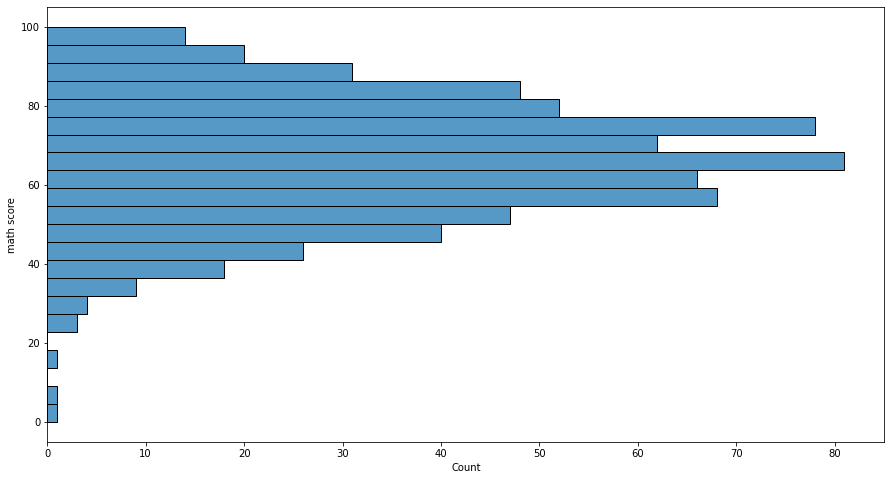

In [136]:
plt.figure(figsize=(15,8))
sns.histplot(data=df, y="math score")

In [137]:
df['reading score'].mean()

69.54477611940298

<AxesSubplot:xlabel='Count', ylabel='reading score'>

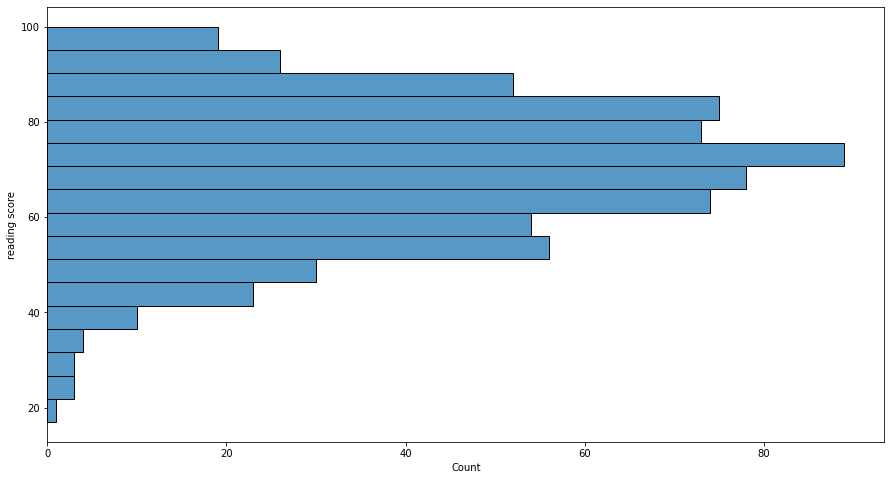

In [138]:
plt.figure(figsize=(15,8))
sns.histplot(data=df, y="reading score")

In [139]:
df['writing score'].mean()

68.47164179104477

<AxesSubplot:xlabel='Count', ylabel='writing score'>

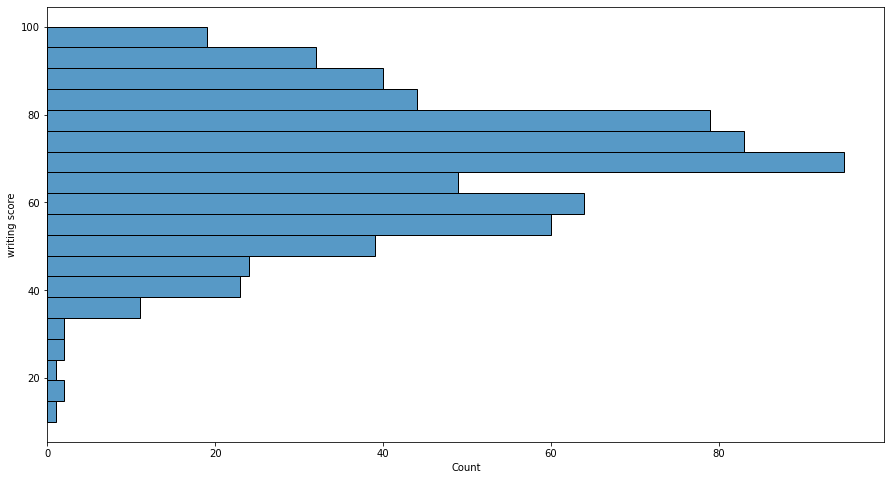

In [140]:
plt.figure(figsize=(15,8))
sns.histplot(data=df, y="writing score")

In [141]:
df.skew(axis = 0, skipna = True) 

/var/folders/jk/cjbqkwps0b36yfvlhxn0gjx00000gn/T/ipykernel_49409/1588858171.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew(axis = 0, skipna = True)


math score      -0.333093
reading score   -0.305184
writing score   -0.319612
dtype: float64

### Correlación

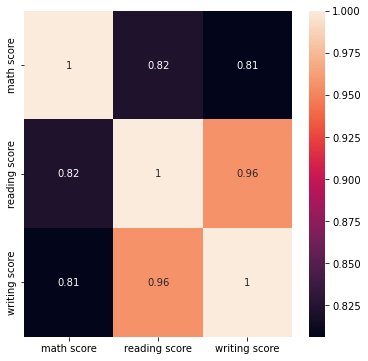

In [142]:
corr_df = df.corr(method='pearson')

plt.figure(figsize=(6, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

Las asignaturas en las que se logra evidenciar mayor correlación son Writing y reading, aunque igual la correlación de las mismas com Math score supera el 0.8%

In [143]:
df_cat = pd.get_dummies(df, columns=["gender"])

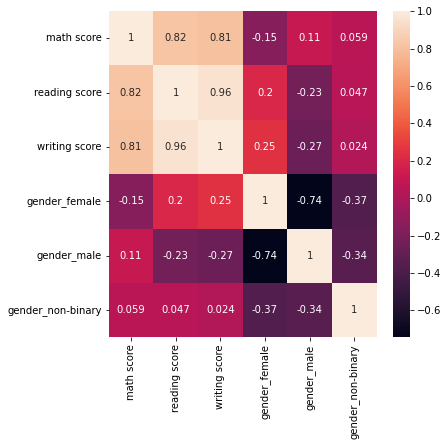

In [144]:
corr_df = df_cat.corr(method='pearson')

plt.figure(figsize=(6, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

In [145]:
df_math_y_gender = df[["gender","math score", "reading score", "writing score"]]
df_promedio = df_math_y_gender.groupby("gender", as_index=False).mean()
df_promedio

,gender,math score,reading score,writing score
0,female,63.647841,72.774086,72.684385
1,male,68.383764,65.354244,63.472325
2,non-binary,68.448980,71.214286,69.357143


In [146]:
df_promedio["promedio ponderado"]=(df_promedio["math score"]+ df_promedio["reading score"] + df_promedio["writing score"])/3
df_promedio

,gender,math score,reading score,writing score,promedio ponderado
0,female,63.647841,72.774086,72.684385,69.702104
1,male,68.383764,65.354244,63.472325,65.736777
2,non-binary,68.448980,71.214286,69.357143,69.673469


### Nivel de escolaridad de los padres 

In [147]:
df_parental = df[df['writing score'] > 85]
df_parental.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
6,non-binary,group B,some college,standard,completed,88.0,95.0,92.0
16,male,group C,high school,standard,none,88.0,89.0,86.0
54,female,group C,some high school,free/reduced,completed,71.0,84.0,87.0
56,female,group E,associate's degree,standard,completed,82.0,85.0,86.0
94,female,group B,some college,standard,none,79.0,86.0,92.0
104,male,group C,some college,standard,completed,98.0,86.0,90.0
106,female,group D,master's degree,standard,none,87.0,100.0,100.0
114,non-binary,group E,bachelor's degree,standard,completed,99.0,100.0,100.0


In [148]:
parental_level_writing = list(df_parental['parental level of education'].unique())
parental_level_writing

['some college',
 "master's degree",
 'high school',
 'some high school',
 "associate's degree",
 "bachelor's degree"]

<AxesSubplot:xlabel='Count', ylabel='parental level of education'>

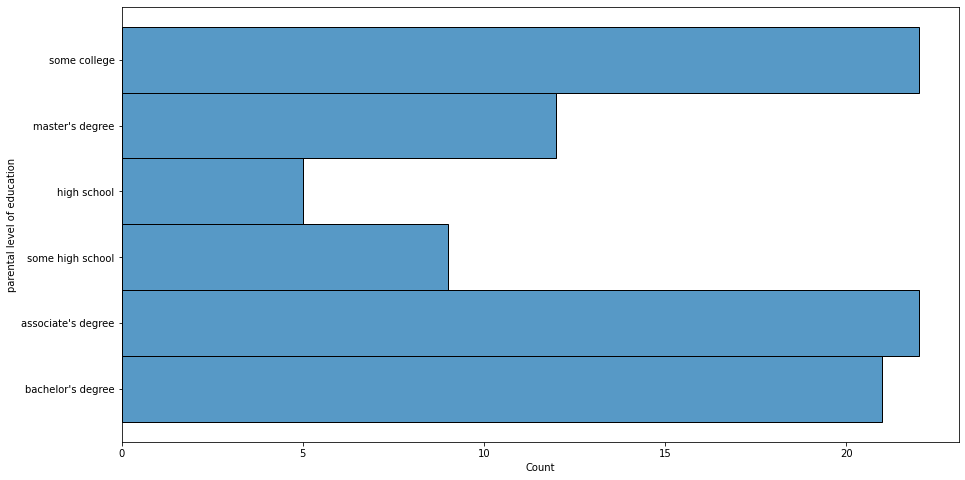

In [149]:
plt.figure(figsize=(15,8))
sns.histplot(data=df_parental, y="parental level of education")

### Porcentaje de estudiantes con promedio superior a 90

In [150]:
df["mean"] = (df["math score"]+ df["reading score"] + df["writing score"])/3 

In [151]:
df_m = df[df["mean"] >= 90]
df_m.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean
2,female,group B,master's degree,standard,none,90.0,95.0,93.0,92.666667
6,non-binary,group B,some college,standard,completed,88.0,95.0,92.0,91.666667
104,male,group C,some college,standard,completed,98.0,86.0,90.0,91.333333
106,female,group D,master's degree,standard,none,87.0,100.0,100.0,95.666667
114,non-binary,group E,bachelor's degree,standard,completed,99.0,100.0,100.0,99.666667
121,male,group B,associate's degree,standard,completed,91.0,89.0,92.0,90.666667
165,female,group C,bachelor's degree,standard,completed,96.0,100.0,100.0,98.666667
268,non-binary,group D,associate's degree,standard,completed,88.0,92.0,95.0,91.666667
276,female,group C,some high school,standard,completed,85.0,92.0,93.0,90.000000
334,female,group C,bachelor's degree,standard,none,83.0,93.0,95.0,90.333333


In [152]:
porcentaje=(df_m.size*100)/df.size
porcentaje

5.6716417910447765

Porcentaje de estudiantes que prepararon los examenes

In [153]:
df_p = df_m[df_m["test preparation course"] == "completed"]
df_p.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean
6,non-binary,group B,some college,standard,completed,88.0,95.0,92.0,91.666667
104,male,group C,some college,standard,completed,98.0,86.0,90.0,91.333333
114,non-binary,group E,bachelor's degree,standard,completed,99.0,100.0,100.0,99.666667
121,male,group B,associate's degree,standard,completed,91.0,89.0,92.0,90.666667
165,female,group C,bachelor's degree,standard,completed,96.0,100.0,100.0,98.666667
268,non-binary,group D,associate's degree,standard,completed,88.0,92.0,95.0,91.666667
276,female,group C,some high school,standard,completed,85.0,92.0,93.0,90.000000
373,non-binary,group D,some college,standard,completed,82.0,97.0,96.0,91.666667
377,female,group D,master's degree,free/reduced,completed,85.0,95.0,100.0,93.333333
403,female,group D,high school,standard,completed,88.0,99.0,100.0,95.666667


In [154]:
porcentaje_prepararon=(df_p.size*100)/df_m.size
porcentaje_prepararon

63.1578947368421